In [143]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 100)

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer

from pathlib import Path

In [491]:
DATA_PATH =  Path.cwd() / "data"
print(DATA_PATH / "training_set_features.csv")
data_df = pd.read_csv(
    DATA_PATH / "train.csv", 
    index_col="tripid"
)


/home/haritha/Documents/machine_learning/project/data/training_set_features.csv


In [492]:
print("data_df.shape", data_df.shape)
#features_df.head()
data_df.head()

data_df.shape (17176, 13)


,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
tripid,,,,,,,,,,,,,
189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct
189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct
189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct
189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,correct
189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,correct


In [493]:
data_df.describe()

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare
count,16974.000000,16974.000000,16974.000000,16974.000000,16974.000000,17176.000000,17176.000000,17176.000000,17176.000000,17039.000000
mean,13.719651,1702.858077,629.074231,32.057666,112.466832,6.965499,79.998389,6.968587,79.997534,312.655466
std,98.975052,8120.160818,8063.260669,465.483573,442.054812,0.210760,0.243384,0.378669,0.359648,605.300565
min,0.000000,0.000000,0.000000,0.000000,0.000000,5.937600,79.819100,5.941860,45.307700,0.000000
25%,10.500000,548.000000,33.000000,0.000000,26.000000,6.865077,79.870400,6.865625,79.870100,125.515000
50%,10.500000,1009.500000,123.000000,0.116600,73.000000,6.914105,79.898600,6.916160,79.899100,211.180000
75%,10.500000,1803.000000,351.000000,14.341800,144.000000,7.043057,79.956600,7.047195,79.960225,366.465000
max,12795.030000,453872.000000,453650.000000,26198.601400,51288.000000,8.051010,81.009600,48.132000,81.009700,26945.990000


In [494]:
#drop nan values
data_df = data_df.dropna()
data_df.head()


,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
tripid,,,,,,,,,,,,,
189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct
189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct
189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct
189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,correct
189129552,10.5,3407.0,182.0,0.0000,112.0,11/1/2019 5:38,11/1/2019 6:35,7.13402,79.8969,6.91865,79.8649,1065.02,correct


In [495]:
data_df.dtypes

additional_fare              float64
duration                     float64
meter_waiting                float64
meter_waiting_fare           float64
meter_waiting_till_pickup    float64
pickup_time                   object
drop_time                     object
pick_lat                     float64
pick_lon                     float64
drop_lat                     float64
drop_lon                     float64
fare                         float64
label                         object
dtype: object

In [496]:
correct_vals = data_df['label']=="correct"
correct_data = data_df[correct_vals]
incorrect_vals = data_df['label']=="incorrect"
incorrect_data = data_df[incorrect_vals]

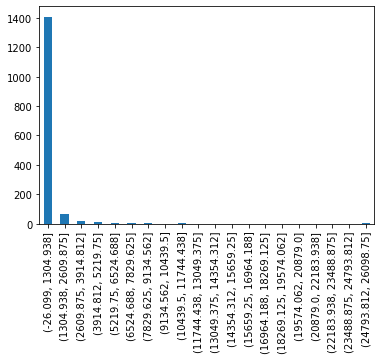

In [497]:
#descretize floats for visualization
fare = pd.cut((incorrect_data)['fare'], bins=20)
ax = fare.value_counts(sort=False).plot.bar()
#ax.set_xticklabels([c[1:-1].replace(","," to") for c in fare.cat.categories])

In [498]:
#plot labels with fare
counts = data_df[['fare', 'label']].groupby(['fare', 'label']).size().unstack('label')
counts


label,correct,incorrect
fare,,
0.00,1.0,13.0
50.48,1.0,NaN
50.63,1.0,NaN
50.72,1.0,NaN
50.75,1.0,NaN
...,...,...
19865.46,NaN,1.0
25097.59,NaN,1.0
25315.09,NaN,1.0


In [499]:
#seperate the labels
label_df = pd.DataFrame(data_df['label'])
print(label_df.columns)
print(label_df.head())
label_df.describe()

Index(['label'], dtype='object')
             label
tripid            
189123628  correct
189125358  correct
189125719  correct
189127273  correct
189129552  correct


,label
count,16968
unique,2
top,correct
freq,15442


In [500]:
#change labels to 1,0
label_map = {'correct': 1, 'incorrect': 0}
label_df['label'] = label_df['label'].map(label_map)
#label_df['label'].eq('correct').mul(1)

data_df = data_df.drop(columns=['label'])
label_df.head()

,label
tripid,
189123628,1
189125358,1
189125719,1
189127273,1
189129552,1


Text(0, 0.5, 'fare_correct')

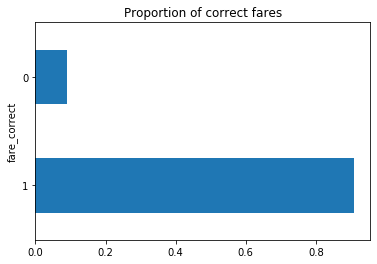

In [501]:
#initial visualizations
fig, ax = plt.subplots(1, 1, sharex=True)

n_obs = label_df.shape[0]

(label_df['label']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of correct fares")
)
ax.set_ylabel("fare_correct")

In [502]:
#feature-engineering - discrepancies IGONRE INF
data_df['duration_desc'] = (data_df['duration']).div(pd.to_datetime(data_df['drop_time']).sub(pd.to_datetime(data_df['pickup_time']))/ np.timedelta64(1, 's'))
data_df['meter_waiting_desc'] = (data_df['meter_waiting_fare'].div(data_df['meter_waiting']))
#replace the inf values from div by 0 with 0
data_df = data_df.replace([np.inf, -np.inf], 0)
data_df['duration_desc'] = (data_df['duration']).div(pd.to_datetime(data_df['drop_time']).sub(pd.to_datetime(data_df['pickup_time']))/ np.timedelta64(1, 's'))
data_df['meter_waiting_desc'] = (data_df['meter_waiting_fare'].div(data_df['meter_waiting']))
#replace the inf values from div by 0 with 0
data_df = data_df.replace([np.inf, -np.inf], 0)


In [503]:
#feature-engineering - dates
#since duration is aready present, it should be sufficient to keep only pick time, and drop drop_time

data_df = data_df.drop(columns=['drop_time'])

#print(data_df.iloc[1, 5])
data_df['weekday'] = pd.to_datetime(data_df['pickup_time']).dt.weekday
data_df['dayOfWeek_bins'] = pd.to_datetime(data_df['pickup_time']).dt.dayofweek
data_df['hour_bins'] = pd.to_datetime(data_df['pickup_time']).dt.hour



In [504]:
#feature-engineering - straight line distance
data_df['distance'] = ((data_df['drop_lat'].sub(data_df['pick_lat'])).mul(data_df['drop_lat'].sub(data_df['pick_lat']))).add((data_df['drop_lon'].sub(data_df['pick_lon'])).mul(data_df['drop_lon'].sub(data_df['pick_lon'])))

In [505]:
data_df.head()

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,duration_desc,meter_waiting_desc,weekday,dayOfWeek_bins,hour_bins,distance
tripid,,,,,,,,,,,,,,,,,
189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,6.86252,79.8993,6.90330,79.8783,270.32,0.992857,0.0000,4,4,0,0.002104
189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,6.88589,79.8984,6.91373,79.8923,197.85,1.014103,0.0000,4,4,0,0.000812
189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,6.90839,79.8651,6.93669,79.9146,301.64,1.006481,0.0000,4,4,1,0.003251
189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,6.92570,79.8895,6.92748,79.8971,82.30,0.996667,0.0578,4,4,2,0.000061
189129552,10.5,3407.0,182.0,0.0000,112.0,11/1/2019 5:38,7.13402,79.8969,6.91865,79.8649,1065.02,0.996199,0.0000,4,4,5,0.047408


In [506]:
data_df.describe()

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare,duration_desc,meter_waiting_desc,weekday,dayOfWeek_bins,hour_bins,distance
count,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16239.000000,16968.000000,16968.000000,16968.000000,16968.000000
mean,13.721437,1702.836987,628.875000,32.045122,112.489510,6.965160,79.998018,6.968278,79.997108,312.657884,0.985100,0.029256,2.919731,2.919731,13.802746,0.174335
std,98.992493,8121.556167,8064.657846,465.564240,442.129943,0.210840,0.242832,0.380253,0.360503,606.372103,0.125664,0.028499,1.940086,1.940086,4.819490,22.267770
min,0.000000,0.000000,0.000000,0.000000,0.000000,5.937600,79.819100,5.941860,45.307700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.500000,548.000000,33.000000,0.000000,26.000000,6.864830,79.870475,6.865580,79.870100,125.500000,0.983333,0.000000,1.000000,1.000000,10.000000,0.000180
50%,10.500000,1009.000000,123.000000,0.115600,73.000000,6.913970,79.898600,6.915940,79.899000,211.050000,0.999145,0.038751,3.000000,3.000000,14.000000,0.000843
75%,10.500000,1802.250000,351.000000,14.334400,144.000000,7.042698,79.956500,7.046555,79.960000,366.205000,1.014667,0.057912,5.000000,5.000000,18.000000,0.003076
max,12795.030000,453872.000000,453650.000000,26198.601400,51288.000000,8.051010,81.009600,48.132000,81.009700,26945.990000,1.883333,0.061413,6.000000,6.000000,23.000000,2900.631234


In [507]:
"""
cols = ['additional_fare','meter_waiting_fare','duration','meter_waiting','meter_waiting_till_pickup','pick_lat','pick_lon', 'drop_lat','drop_lon','fare']
for col  in cols:
    data_df = data_df.astype({col: 'float32'})
"""

"\ncols = ['additional_fare','meter_waiting_fare','duration','meter_waiting','meter_waiting_till_pickup','pick_lat','pick_lon', 'drop_lat','drop_lon','fare']\nfor col  in cols:\n    data_df = data_df.astype({col: 'float32'})\n"

In [508]:

data_df = data_df.astype({'dayOfWeek_bins': 'uint8'})
data_df = data_df.astype({'hour_bins': 'uint8'})
data_df = data_df.drop(columns=['pickup_time'])


In [509]:
data_df.describe()

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare,duration_desc,meter_waiting_desc,weekday,dayOfWeek_bins,hour_bins,distance
count,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16239.000000,16968.000000,16968.000000,16968.000000,16968.000000
mean,13.721437,1702.836987,628.875000,32.045122,112.489510,6.965160,79.998018,6.968278,79.997108,312.657884,0.985100,0.029256,2.919731,2.919731,13.802746,0.174335
std,98.992493,8121.556167,8064.657846,465.564240,442.129943,0.210840,0.242832,0.380253,0.360503,606.372103,0.125664,0.028499,1.940086,1.940086,4.819490,22.267770
min,0.000000,0.000000,0.000000,0.000000,0.000000,5.937600,79.819100,5.941860,45.307700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.500000,548.000000,33.000000,0.000000,26.000000,6.864830,79.870475,6.865580,79.870100,125.500000,0.983333,0.000000,1.000000,1.000000,10.000000,0.000180
50%,10.500000,1009.000000,123.000000,0.115600,73.000000,6.913970,79.898600,6.915940,79.899000,211.050000,0.999145,0.038751,3.000000,3.000000,14.000000,0.000843
75%,10.500000,1802.250000,351.000000,14.334400,144.000000,7.042698,79.956500,7.046555,79.960000,366.205000,1.014667,0.057912,5.000000,5.000000,18.000000,0.003076
max,12795.030000,453872.000000,453650.000000,26198.601400,51288.000000,8.051010,81.009600,48.132000,81.009700,26945.990000,1.883333,0.061413,6.000000,6.000000,23.000000,2900.631234


In [510]:
#data_df = pd.concat([data_df, pd.get_dummies(data_df['dayOfWeek_bins'], prefix = "dayOfWeek")], axis=1).drop(['dayOfWeek_bins'], axis=1)
#data_df = pd.concat([data_df, pd.get_dummies(data_df['hour_bins'], prefix = "hour")], axis=1).drop(['hour_bins'], axis=1)
data_df = data_df.drop(['dayOfWeek_bins', 'hour_bins'], axis=1)

In [511]:
#feature engineering - bin & encode lat, long,  day of week and hour

cols_to_bin = ['pick_lat', 'pick_lon', 'drop_lat', 'drop_lon']
bin_values = []
for i in range(len(cols_to_bin)):
    print(i)
    if (i <8):
        data_df[cols_to_bin[i]+"_bins"], bins = pd.cut(data_df[cols_to_bin[i]], 10, retbins=True)
        #data_df = data_df.astype({cols_to_bin[i]+"_bins": 'int32'})
        data_df = data_df.drop(cols_to_bin[i], axis=1)
        bin_values.append(bins)
    #one_hot = pd.get_dummies(data_df[cols_to_bin[i]+"_bins"], prefix = cols_to_bin[i])
    #data_df = data_df.drop(cols_to_bin[i]+"_bins", axis=1)
    #data_df = data_df.join(one_hot)
    data_df = pd.concat([data_df, pd.get_dummies(data_df[cols_to_bin[i]+"_bins"], prefix = cols_to_bin[i])], axis=1).drop([cols_to_bin[i]+"_bins"], axis=1)



0
1
2
3


In [512]:
data_df.describe()

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,duration_desc,meter_waiting_desc,weekday,distance,"pick_lat_(5.935, 6.149]","pick_lat_(6.149, 6.36]","pick_lat_(6.36, 6.572]","pick_lat_(6.572, 6.783]","pick_lat_(6.783, 6.994]","pick_lat_(6.994, 7.206]","pick_lat_(7.206, 7.417]","pick_lat_(7.417, 7.628]","pick_lat_(7.628, 7.84]","pick_lat_(7.84, 8.051]","pick_lon_(79.818, 79.938]","pick_lon_(79.938, 80.057]","pick_lon_(80.057, 80.176]","pick_lon_(80.176, 80.295]","pick_lon_(80.295, 80.414]","pick_lon_(80.414, 80.533]","pick_lon_(80.533, 80.652]","pick_lon_(80.652, 80.772]","pick_lon_(80.772, 80.891]","pick_lon_(80.891, 81.01]","drop_lat_(5.9, 10.161]","drop_lat_(10.161, 14.38]","drop_lat_(14.38, 18.599]","drop_lat_(18.599, 22.818]","drop_lat_(22.818, 27.037]","drop_lat_(27.037, 31.256]","drop_lat_(31.256, 35.475]","drop_lat_(35.475, 39.694]","drop_lat_(39.694, 43.913]","drop_lat_(43.913, 48.132]","drop_lon_(45.272, 48.878]","drop_lon_(48.878, 52.448]","drop_lon_(52.448, 56.018]","drop_lon_(56.018, 59.588]","drop_lon_(59.588, 63.159]","drop_lon_(63.159, 66.729]","drop_lon_(66.729, 70.299]","drop_lon_(70.299, 73.869]","drop_lon_(73.869, 77.44]","drop_lon_(77.44, 81.01]"
count,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16239.000000,16968.000000,16968.000000,16968.000000,16968.0,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.0,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.0,16968.000000,16968.000000,16968.0,16968.0,16968.0,16968.0,16968.0,16968.0,16968.0,16968.0,16968.000000,16968.000000,16968.0,16968.0,16968.0,16968.0,16968.0,16968.0,16968.0,16968.0,16968.000000
mean,13.721437,1702.836987,628.875000,32.045122,112.489510,312.657884,0.985100,0.029256,2.919731,0.174335,0.017091,0.0,0.000530,0.029998,0.652876,0.132131,0.143977,0.023220,0.0,0.000177,0.702381,0.140028,0.007013,0.016384,0.019507,0.000707,0.106200,0.007544,0.0,0.000236,0.999941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000059,0.000059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.999941
std,98.992493,8121.556167,8064.657846,465.564240,442.129943,606.372103,0.125664,0.028499,1.940086,22.267770,0.129614,0.0,0.023025,0.170586,0.476070,0.338643,0.351077,0.150607,0.0,0.013296,0.457225,0.347027,0.083453,0.126950,0.138304,0.026585,0.308102,0.086528,0.0,0.015352,0.007677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007677,0.007677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007677
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,10.500000,548.000000,33.000000,0.000000,26.000000,125.500000,0.983333,0.000000,1.000000,0.000180,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
50%,10.500000,1009.000000,123.000000,0.115600,73.000000,211.050000,0.999145,0.038751,3.000000,0.000843,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
75%,10.500000,1802.250000,351.000000,14.334400,144.000000,366.205000,1.014667,0.057912,5.000000,0.003076,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
max,1

In [513]:
#data_df = data_df.drop(['drop_lat', 'drop_lon'], axis=1)
#data_df.describe()


In [514]:
#import ml libs
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression, Lasso, SGDClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score, f1_score

from xgboost import XGBClassifier

import xgboost

from scipy.stats import uniform, randint

RANDOM_SEED = 6   

In [515]:
# chain preprocessing into a Pipeline object

numeric_preprocessing_steps = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('simple_imputer', SimpleImputer(strategy='median'))
])

# create the preprocessor stage of final pipeline

preprocessor = ColumnTransformer(
    transformers = [
        ("numeric", numeric_preprocessing_steps, data_df.columns.values)
    ],
    remainder = "drop"
)

estimators = XGBClassifier()
    #estimator=Lasso(alpha = 0.1)
    #estimator=SGDClassifier(loss="hinge", penalty="l2", max_iter=250)
    #estimator=LinearSVC(random_state=0, tol=1e-5)
    #estimator=RandomForestClassifier(n_estimators=50, max_depth=None, min_samples_split=0.8, random_state=0)
    #estimator=LogisticRegression(penalty="l2", C=0.2, max_iter=1000 ,solver='saga')
    #estimator=XGBClassifier()
    #estimator=MLPClassifier(random_state=1, max_iter=1000)
    #estimator = XGBClassifier(colsample_bytree=0.8537372967645764, learning_rate=0.2525060832685997, max_depth=3, n_estimators=144, reg_lambda=1.5076501307909418, scale_pos_weight=0.6360462149881729, subsample=0.8580216671077318)
    #estimator = XGBClassifier(colsample_bytree=0.9244219538288596, learning_rate=0.2735309364270413, max_depth=5, n_estimators=133, reg_lambda=0.6842872390986001, scale_pos_weight=0.8765350119889967, subsample=0.9712334561304199)


"""
estimator=XGBClassifier(max_depth=8, learning_rate=0.1,silent=False, objective='binary:hinge', \
                      booster='gbtree', n_jobs=8, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, \
                      subsample=0.8, colsample_bytree=0.8, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=0.5)
"""
#estimator = XGBClassifier(colsample_bytree=0.8537372967645764, learning_rate=0.2525060832685997, max_depth=3, n_estimators=144, reg_lambda=1.5076501307909418, scale_pos_weight=0.6360462149881729, subsample=0.8580216671077318)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators),
])

full_pipeline

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numeric',
                                                  Pipeline(memory=None,
                                                           steps=[('standard_scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True)),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                 

In [519]:
#split into train /test sets
X_train, X_eval, y_train, y_eval = train_test_split(
    data_df,
    label_df,
    test_size=0.2,
    shuffle=True,
    stratify=label_df,
    random_state=RANDOM_SEED
)

In [520]:
#define f1 metric for training evaluation
def f1_eval(y_pred, dtrain):
    y_true = dtrain.get_label()
    err = 1-f1_score(y_true, np.round(y_pred))
    return 'f1_err', err

In [521]:
%%time

# Train model
#full_pipeline.fit(X_train, y_train, estimators__eval_metric=f1_eval)
full_pipeline.fit(X_train, y_train)

# Predict on evaluation set
preds = full_pipeline.predict(X_eval)
preds

/home/haritha/anaconda3/envs/mlProject/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/haritha/anaconda3/envs/mlProject/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 6.48 s, sys: 16.3 ms, total: 6.5 s
Wall time: 609 ms


array([1, 1, 1, ..., 1, 1, 1])

In [216]:

#search for the best parameters for XGBoost
params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4),
    "reg_lambda": uniform(0.3,3),
    "scale_pos_weight": uniform(0.2,2)
}
xgb_model = XGBClassifier()
search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42, n_iter=400, cv=3, verbose=1, n_jobs=1, return_train_score=True)


In [271]:
#instead of pipeline, search
search.fit(X_train, y_train)



Fitting 3 folds for each of 400 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/haritha/anaconda3/envs/mlProject/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/haritha/anaconda3/envs/mlProject/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KeyboardInterrupt: 

In [217]:
#identify the best scores
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")data_df['meter_waiting_desc'] = (data_df['meter_waiting_fare'].div(data_df['meter_waiting']))
            
report_best_scores(search.cv_results_, 1)

AttributeError: 'RandomizedSearchCV' object has no attribute 'cv_results_'

In [218]:
    #estimator = XGBClassifier(colsample_bytree=0.9244219538288596, learning_rate=0.2735309364270413, max_depth=5, n_estimators=133, reg_lambda=0.6842872390986001, scale_pos_weight=0.8765350119889967, subsample=0.9712334561304199)


In [522]:
y_preds = pd.DataFrame(
    {
        "fare": preds[0]
    },
    index = y_eval.index
)data_df['meter_waiting_desc'] = (data_df['meter_waiting_fare'].div(data_df['meter_waiting']))
print("y_preds.shape:", y_preds.shape)
y_preds.describe()

SyntaxError: invalid syntax (<ipython-input-522-c6af8e9b702b>, line 6)

In [523]:
#measure accuracy
print ("Accuracy", accuracy_score(y_eval, preds))
print ("F1", f1_score(y_eval, preds))

Accuracy 0.9478491455509723
F1 0.9718287442304633


In [528]:
#load test data
test_features_df = pd.read_csv(DATA_PATH / "test.csv", 
                               index_col="tripid")

test_features_df.head()

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare
tripid,,,,,,,,,,,,
213284604,10.5,924,42,2.4486,148,2/1/2020 0:38,2/1/2020 0:53,6.83454,79.8750,6.77490,79.8840,289.27
213286352,10.5,4249,20,0.0000,91,2/1/2020 1:02,2/1/2020 2:13,6.91168,79.8723,6.55091,79.9706,1912.70
213293973,10.5,1552,255,2.6588,23,2/1/2020 5:02,2/1/2020 5:28,6.92145,79.8478,6.90539,79.8989,394.00
213294622,10.5,462,16,0.0000,198,2/1/2020 5:30,2/1/2020 5:38,6.77433,79.9416,6.80401,79.9407,154.32
213298687,10.5,814,392,12.3692,69,2/1/2020 7:00,2/1/2020 7:14,6.97968,79.9130,6.98875,79.8914,147.47


In [529]:
#preproccessing
#feature-engineering 
#since duration is aready present, it should be sufficient to keep only pick time, and drop drop_time

test_features_df['duration_desc'] = (test_features_df['duration']).div(pd.to_datetime(test_features_df['drop_time']).sub(pd.to_datetime(test_features_df['pickup_time']))/ np.timedelta64(1, 's'))
test_features_df['meter_waiting_desc'] = (test_features_df['meter_waiting_fare'].div(test_features_df['meter_waiting']))
#replace the inf values from div by 0 with 0
test_features_df = test_features_df.replace([np.inf, -np.inf], 0)

test_features_df = test_features_df.drop(columns=['drop_time'])

test_features_df['weekday'] = pd.to_datetime(test_features_df['pickup_time']).dt.weekday
test_features_df['dayOfWeek_bins'] = pd.to_datetime(test_features_df['pickup_time']).dt.dayofweek
test_features_df['hour_bins'] = pd.to_datetime(test_features_df['pickup_time']).dt.hour
test_features_df['distance'] = ((test_features_df['drop_lat'].sub(test_features_df['pick_lat'])).mul(test_features_df['drop_lat'].sub(test_features_df['pick_lat']))).add((test_features_df['drop_lon'].sub(test_features_df['pick_lon'])).mul(test_features_df['drop_lon'].sub(test_features_df['pick_lon'])))
"""
cols = ['additional_fare','meter_waiting_fare','duration','meter_waiting','meter_waiting_till_pickup','pick_lat','pick_lon', 'drop_lat','drop_lon','fare']
for col  in cols:
    test_features_df = test_features_df.astype({col: 'float32'})
"""    

#test_features_df = test_features_df.astype({'dayOfWeek_bins': 'uint8'})
#test_features_df = test_features_df.astype({'hour_bins': 'uint8'})
test_features_df = test_features_df.drop(columns=['pickup_time'])
    
#test_features_df = pd.concat([test_features_df, pd.get_dummies(test_features_df['dayOfWeek_bins'], prefix = "dayOfWeek")], axis=1).drop(['dayOfWeek_bins'], axis=1)
#test_features_df = pd.concat([test_features_df, pd.get_dummies(test_features_df['hour_bins'], prefix = "hour")], axis=1).drop(['hour_bins'], axis=1)


#feature engineering - bin & encode lat, long,  day of week and hour

cols_to_bin = ['pick_lat', 'pick_lon', 'drop_lat', 'drop_lon']

for i in range(len(cols_to_bin)):
    print(i)
    if (i <4):
        test_features_df[cols_to_bin[i]+"_bins"] = pd.cut(test_features_df[cols_to_bin[i]], bins=bin_values[i])
        test_features_df = test_features_df.drop(cols_to_bin[i], axis=1)

    test_features_df = pd.concat([test_features_df, pd.get_dummies(test_features_df[cols_to_bin[i]+"_bins"], prefix = cols_to_bin[i])], axis=1).drop([cols_to_bin[i]+"_bins"], axis=1)


    

    
    
    
test_features_df.describe()   

0
1
2
3


,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,duration_desc,meter_waiting_desc,weekday,dayOfWeek_bins,hour_bins,distance,"pick_lat_(5.935, 6.149]","pick_lat_(6.149, 6.36]","pick_lat_(6.36, 6.572]","pick_lat_(6.572, 6.783]","pick_lat_(6.783, 6.994]","pick_lat_(6.994, 7.206]","pick_lat_(7.206, 7.417]","pick_lat_(7.417, 7.628]","pick_lat_(7.628, 7.84]","pick_lat_(7.84, 8.051]","pick_lon_(79.818, 79.938]","pick_lon_(79.938, 80.057]","pick_lon_(80.057, 80.176]","pick_lon_(80.176, 80.295]","pick_lon_(80.295, 80.414]","pick_lon_(80.414, 80.533]","pick_lon_(80.533, 80.652]","pick_lon_(80.652, 80.772]","pick_lon_(80.772, 80.891]","pick_lon_(80.891, 81.01]","drop_lat_(5.9, 10.161]","drop_lat_(10.161, 14.38]","drop_lat_(14.38, 18.599]","drop_lat_(18.599, 22.818]","drop_lat_(22.818, 27.037]","drop_lat_(27.037, 31.256]","drop_lat_(31.256, 35.475]","drop_lat_(35.475, 39.694]","drop_lat_(39.694, 43.913]","drop_lat_(43.913, 48.132]","drop_lon_(45.272, 48.878]","drop_lon_(48.878, 52.448]","drop_lon_(52.448, 56.018]","drop_lon_(56.018, 59.588]","drop_lon_(59.588, 63.159]","drop_lon_(63.159, 66.729]","drop_lon_(66.729, 70.299]","drop_lon_(70.299, 73.869]","drop_lon_(73.869, 77.44]","drop_lon_(77.44, 81.01]"
count,8576.000000,8576.000000,8576.000000,8576.000000,8576.000000,8576.000000,8576.000000,8278.000000,8576.000000,8576.000000,8576.000000,8576.000000,8576.000000,8576.0,8576.000000,8576.000000,8576.000000,8576.000000,8576.000000,8576.000000,8576.0,8576.0,8576.000000,8576.000000,8576.000000,8576.000000,8576.000000,8576.000000,8576.000000,8576.000000,8576.000000,8576.0,8576.0,8576.0,8576.0,8576.0,8576.0,8576.0,8576.0,8576.0,8576.0,8576.0,8576.0,8576.0,8576.0,8576.0,8576.0,8576.0,8576.0,8576.0,8576.0,8576.0
mean,11.088095,1541.590485,508.502099,24.671655,119.863106,293.278057,0.986024,0.026036,3.009445,3.009445,13.964202,0.003087,0.018540,0.0,0.000933,0.030550,0.638293,0.126749,0.161614,0.023204,0.0,0.0,0.683419,0.142024,0.009562,0.018190,0.019706,0.000350,0.116954,0.009562,0.000117,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
std,5.359602,5952.458574,5784.005855,333.515641,793.233190,436.730282,0.124704,0.028403,1.962216,1.962216,4.811721,0.007716,0.134902,0.0,0.030530,0.172106,0.480523,0.332711,0.368118,0.150561,0.0,0.0,0.465170,0.349095,0.097320,0.133647,0.138997,0.018701,0.321385,0.097320,0.010798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25%,10.500000,540.000000,30.000000,0.000000,26.000000,126.077500,0.983333,0.000000,1.000000,1.000000,10.000000,0.000197,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
50%,10.500000,982.500000,116.000000,0.000000,72.000000,203.950000,0.999447,0.000000,3.000000,3.000000,14.000000,0.000847,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
75%,10.500000,1723.000000,336.250000,11.744200,138.000000,344.075000,1.014920,0.057837,5.000000,5.000000,18.000000,0.002950,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
max,160.500000,447230.000000,446934.000000,25760.361800,55571.000000,268

In [530]:
data_df.describe()

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,duration_desc,meter_waiting_desc,weekday,distance,"pick_lat_(5.935, 6.149]","pick_lat_(6.149, 6.36]","pick_lat_(6.36, 6.572]","pick_lat_(6.572, 6.783]","pick_lat_(6.783, 6.994]","pick_lat_(6.994, 7.206]","pick_lat_(7.206, 7.417]","pick_lat_(7.417, 7.628]","pick_lat_(7.628, 7.84]","pick_lat_(7.84, 8.051]","pick_lon_(79.818, 79.938]","pick_lon_(79.938, 80.057]","pick_lon_(80.057, 80.176]","pick_lon_(80.176, 80.295]","pick_lon_(80.295, 80.414]","pick_lon_(80.414, 80.533]","pick_lon_(80.533, 80.652]","pick_lon_(80.652, 80.772]","pick_lon_(80.772, 80.891]","pick_lon_(80.891, 81.01]","drop_lat_(5.9, 10.161]","drop_lat_(10.161, 14.38]","drop_lat_(14.38, 18.599]","drop_lat_(18.599, 22.818]","drop_lat_(22.818, 27.037]","drop_lat_(27.037, 31.256]","drop_lat_(31.256, 35.475]","drop_lat_(35.475, 39.694]","drop_lat_(39.694, 43.913]","drop_lat_(43.913, 48.132]","drop_lon_(45.272, 48.878]","drop_lon_(48.878, 52.448]","drop_lon_(52.448, 56.018]","drop_lon_(56.018, 59.588]","drop_lon_(59.588, 63.159]","drop_lon_(63.159, 66.729]","drop_lon_(66.729, 70.299]","drop_lon_(70.299, 73.869]","drop_lon_(73.869, 77.44]","drop_lon_(77.44, 81.01]"
count,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16239.000000,16968.000000,16968.000000,16968.000000,16968.0,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.0,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.000000,16968.0,16968.000000,16968.000000,16968.0,16968.0,16968.0,16968.0,16968.0,16968.0,16968.0,16968.0,16968.000000,16968.000000,16968.0,16968.0,16968.0,16968.0,16968.0,16968.0,16968.0,16968.0,16968.000000
mean,13.721437,1702.836987,628.875000,32.045122,112.489510,312.657884,0.985100,0.029256,2.919731,0.174335,0.017091,0.0,0.000530,0.029998,0.652876,0.132131,0.143977,0.023220,0.0,0.000177,0.702381,0.140028,0.007013,0.016384,0.019507,0.000707,0.106200,0.007544,0.0,0.000236,0.999941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000059,0.000059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.999941
std,98.992493,8121.556167,8064.657846,465.564240,442.129943,606.372103,0.125664,0.028499,1.940086,22.267770,0.129614,0.0,0.023025,0.170586,0.476070,0.338643,0.351077,0.150607,0.0,0.013296,0.457225,0.347027,0.083453,0.126950,0.138304,0.026585,0.308102,0.086528,0.0,0.015352,0.007677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007677,0.007677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007677
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,10.500000,548.000000,33.000000,0.000000,26.000000,125.500000,0.983333,0.000000,1.000000,0.000180,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
50%,10.500000,1009.000000,123.000000,0.115600,73.000000,211.050000,0.999145,0.038751,3.000000,0.000843,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
75%,10.500000,1802.250000,351.000000,14.334400,144.000000,366.205000,1.014667,0.057912,5.000000,0.003076,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
max,1

In [531]:
test_preds = full_pipeline.predict(test_features_df)
test_preds

/home/haritha/anaconda3/envs/mlProject/lib/python3.8/site-packages/sklearn/compose/_column_transformer.py:427: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "


array([1, 1, 1, ..., 1, 1, 1])

In [532]:
co = 0
for val in test_preds:
    if val == 0:
        co+=1
co

400

In [535]:
submission_df = pd.read_csv(DATA_PATH / "sample_submission.csv", 
                            index_col="tripid")
submission_df.head()

,prediction
tripid,
213284604,1
213286352,0
213293973,0
213294622,1
213298687,1


In [536]:
test_preds_df = pd.DataFrame(
    {
        "fare": test_preds[0]
    },
    index = test_features_df.index
)
print("test_preds.shape:", test_preds.shape)
test_preds_df.describe()

test_preds.shape: (8576,)


,fare
count,8576.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [537]:
# Make sure we have the rows in the same order
np.testing.assert_array_equal(test_features_df.index.values, 
                              submission_df.index.values)

# Save predictions to submission data frame
submission_df["prediction"] = test_preds

submission_df.head()

,prediction
tripid,
213284604,1
213286352,1
213293973,1
213294622,1
213298687,1


In [538]:
submission_df.to_csv('submission.csv', index=True)
!head submission.csv

tripid,prediction
213284604,1
213286352,1
213293973,1
213294622,1
213298687,1
213299545,1
213302332,1
213302671,1
213305594,1
